In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import scale
import matplotlib.cm as cm

In [3]:
from sklearn.impute import IterativeImputer

In [4]:
data = pd.read_csv('Youth_Tobacco_Survey__YTS__Data.csv')

In [5]:
# Display of the first few rows of the dataset to understand its structure
print(data.head())

   YEAR LocationAbbr   LocationDesc                  TopicType  \
0  2004           OH           Ohio  Tobacco Use – Survey Data   
1  2008           AL        Alabama  Tobacco Use – Survey Data   
2  2015           WV  West Virginia  Tobacco Use – Survey Data   
3  2005           IL       Illinois  Tobacco Use – Survey Data   
4  2005           CT    Connecticut  Tobacco Use – Survey Data   

                       TopicDesc     MeasureDesc DataSource  Response  \
0          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
1          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
2  Smokeless Tobacco Use (Youth)     User Status        YTS  Frequent   
3          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
4  Smokeless Tobacco Use (Youth)     User Status        YTS      Ever   

  Data_Value_Unit Data_Value_Type  ...                    GeoLocation  \
0               %      Percentage  ...  (40.060210141, -82.404260056)   
1               % 

In [6]:
# Identify categorical 
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc', 'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Gender', 'Race', 'Age', 'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID']


In [7]:
# Select columns for clustering analysis
selected_columns = ['LocationDesc', 'Gender', 'Education', 'TopicDesc']

In [8]:
# Extract selected columns
selected_data = data[selected_columns]

In [9]:
print(selected_data)

        LocationDesc   Gender      Education                      TopicDesc
0               Ohio  Overall  Middle School          Cigarette Use (Youth)
1            Alabama   Female    High School          Cigarette Use (Youth)
2      West Virginia     Male    High School  Smokeless Tobacco Use (Youth)
3           Illinois  Overall  Middle School          Cigarette Use (Youth)
4        Connecticut     Male    High School  Smokeless Tobacco Use (Youth)
...              ...      ...            ...                            ...
10595         Kansas  Overall  Middle School  Smokeless Tobacco Use (Youth)
10596       Illinois     Male    High School          Cigarette Use (Youth)
10597      Wisconsin   Female  Middle School              Cessation (Youth)
10598      Louisiana   Female  Middle School          Cigarette Use (Youth)
10599       Delaware   Female    High School          Cigarette Use (Youth)

[10600 rows x 4 columns]


In [10]:
print("Missing values before imputation:")
print(data.isnull().sum())

Missing values before imputation:
YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2             

In [11]:
from sklearn.impute import SimpleImputer
# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')  # Use most frequent value imputation
imputed_data = imputer.fit_transform(selected_data)
imputed_data_df = pd.DataFrame(imputed_data, columns=selected_data.columns)

In [12]:
print("Missing values after imputation:")
print(imputed_data_df.isnull().sum())

Missing values after imputation:
LocationDesc    0
Gender          0
Education       0
TopicDesc       0
dtype: int64


In [13]:
# Convert categorical variables to numerical using one-hot encoding
imputed_data_encoded = pd.get_dummies(imputed_data_df)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data_encoded)

In [14]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)
kmeans_silhouette_score = silhouette_score(scaled_data, kmeans_clusters)

In [15]:
print("KMeans Silhouette Score:", kmeans_silhouette_score)

KMeans Silhouette Score: 0.03544062956069586


In [16]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)
dbscan_silhouette_score = silhouette_score(scaled_data, dbscan_clusters)

print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

DBSCAN Silhouette Score: 0.9312485315287082


In [17]:
# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(scaled_data)
hierarchical_silhouette_score = silhouette_score(scaled_data, hierarchical_clusters)

print("Hierarchical Silhouette Score:", hierarchical_silhouette_score)

Hierarchical Silhouette Score: -0.09020646821538895


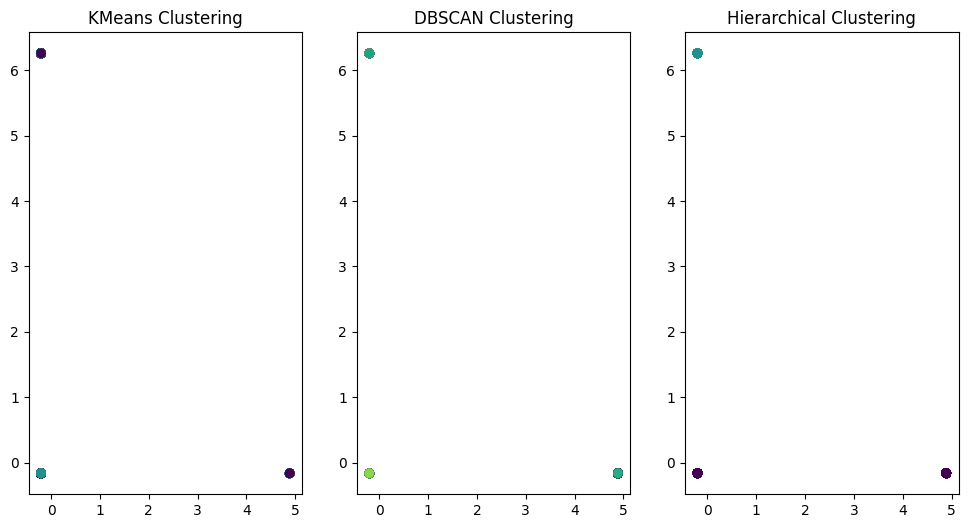

In [18]:
# Plot clustering results
plt.figure(figsize=(12, 6))

# Plot KMeans clusters
plt.subplot(1, 3, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='viridis', marker='o')
plt.title('KMeans Clustering')

# Plot DBSCAN clusters
plt.subplot(1, 3, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')

# Plot Hierarchical clusters
plt.subplot(1, 3, 3)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_clusters, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')

plt.show()

In [19]:
print(imputed_data_df.columns)

Index(['LocationDesc', 'Gender', 'Education', 'TopicDesc'], dtype='object')


Text(0.5, 1.0, 'TopicDesc vs Gender')

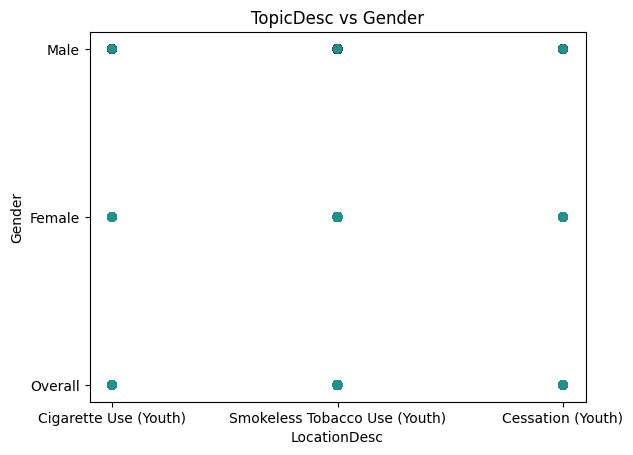

In [20]:
# Plot clusters for TopicDesc vs Gender
plt.subplot(1, 1, 1)
plt.scatter(imputed_data_df['TopicDesc'], imputed_data_df['Gender'], c=kmeans_clusters, cmap='viridis', marker='o')
plt.xlabel('LocationDesc')
plt.ylabel('Gender')
plt.title('TopicDesc vs Gender')

Text(0.5, 1.0, 'TopicDesc vs Education')

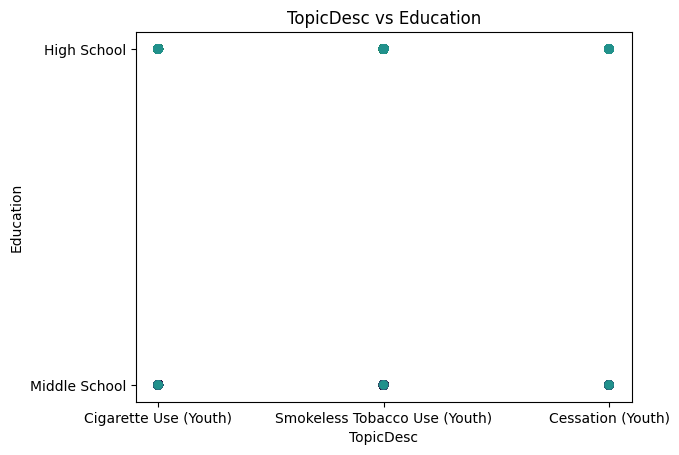

In [21]:
# Plot clusters for TopicDesc vs Education
plt.subplot(1, 1, 1)
plt.scatter(imputed_data_df['TopicDesc'], imputed_data_df['Education'], c=kmeans_clusters, cmap='viridis', marker='o')
plt.xlabel('TopicDesc')
plt.ylabel('Education')
plt.title('TopicDesc vs Education')

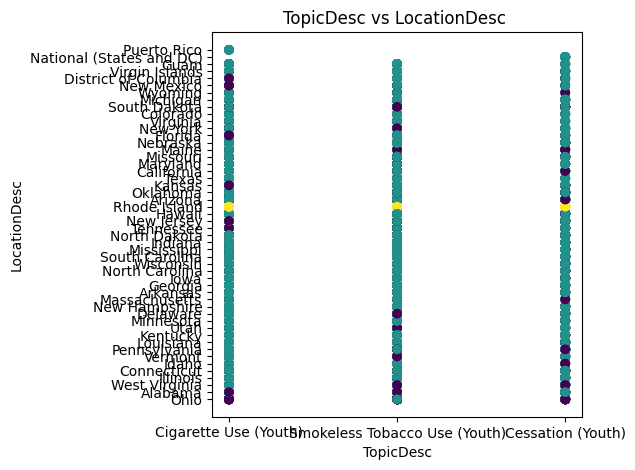

In [22]:
# Plot clusters for TopicDesc vs LocationDesc
plt.subplot(1, 1, 1)
plt.scatter(imputed_data_df['TopicDesc'], imputed_data_df['LocationDesc'], c=kmeans_clusters, cmap='viridis', marker='o')
plt.xlabel('TopicDesc')
plt.ylabel('LocationDesc')
plt.title('TopicDesc vs LocationDesc ')

plt.tight_layout()
plt.show()

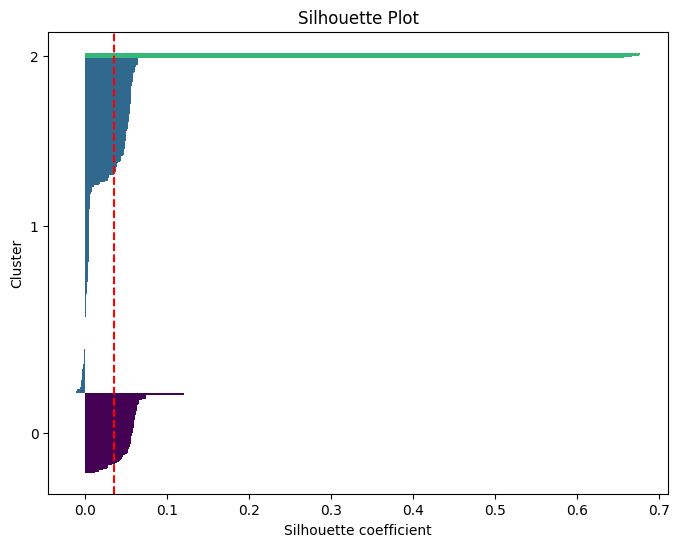

In [23]:
from sklearn.metrics import silhouette_samples

# Silhouette Plot
plt.figure(figsize=(8, 6))

# Compute silhouette scores
silhouette_vals = silhouette_samples(scaled_data, kmeans_clusters)

y_lower, y_upper = 0, 0
yticks = []

for i, cluster in enumerate(np.unique(kmeans_clusters)):
    cluster_silhouette_vals = silhouette_vals[kmeans_clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.viridis(float(i) / len(np.unique(kmeans_clusters)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, color=color)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, np.unique(kmeans_clusters))
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot')
plt.show()

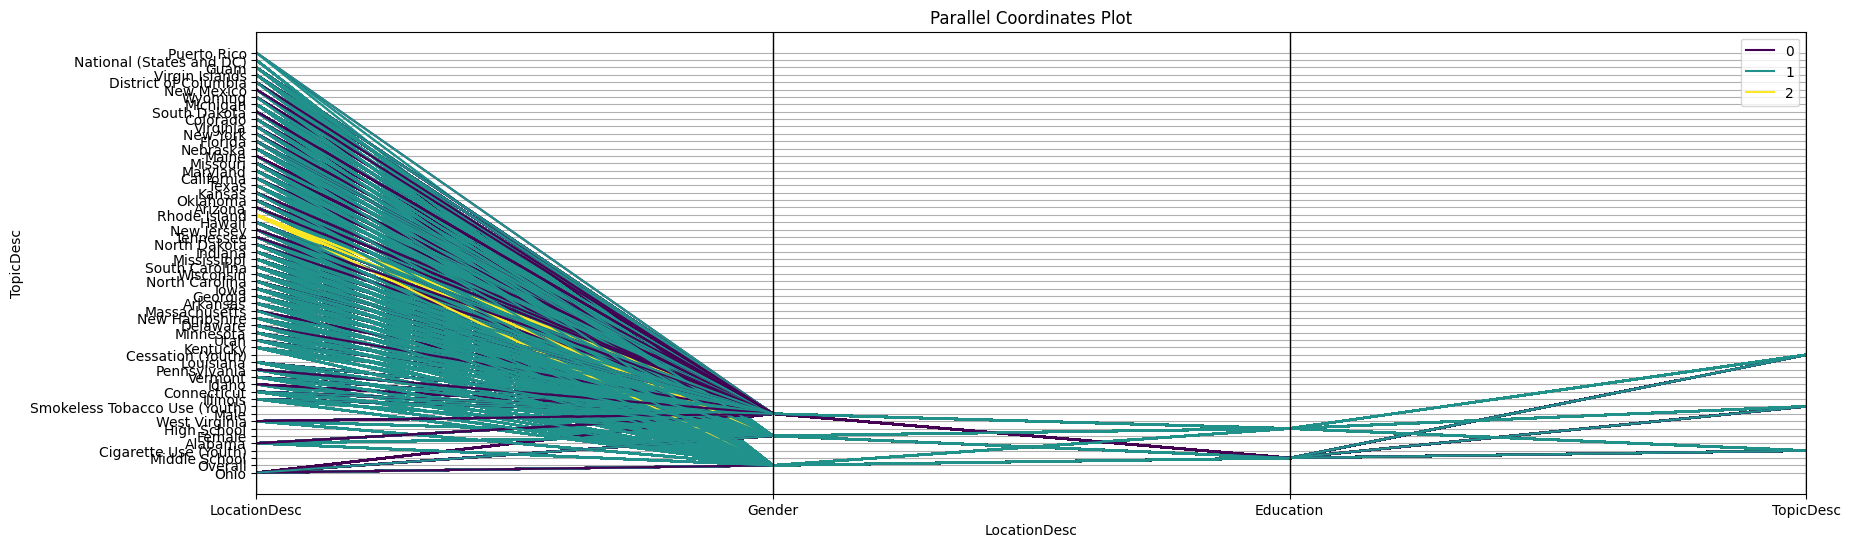

In [24]:
from pandas.plotting import parallel_coordinates

# Add cluster labels to the dataframe
imputed_data_df['Cluster'] = kmeans_clusters

# Parallel Coordinates Plot
plt.figure(figsize=(20, 6))
parallel_coordinates(imputed_data_df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.xlabel('LocationDesc')
plt.ylabel('TopicDesc')
plt.legend(loc='upper right')
plt.show()

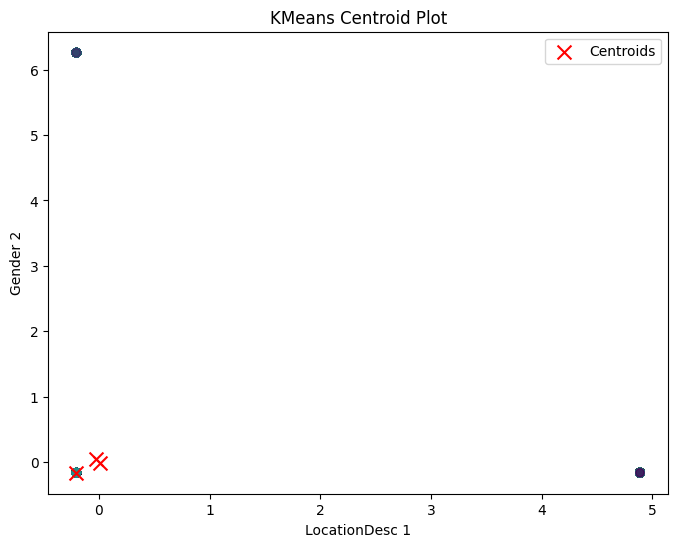

In [25]:
# Centroid Plot
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', alpha=0.5)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('KMeans Centroid Plot')
plt.xlabel('LocationDesc 1')
plt.ylabel('Gender 2')
plt.legend()
plt.show()

DBSCAN Silhouette Score: 0.9312485315287082


Text(0, 0.5, 'Cluster label')

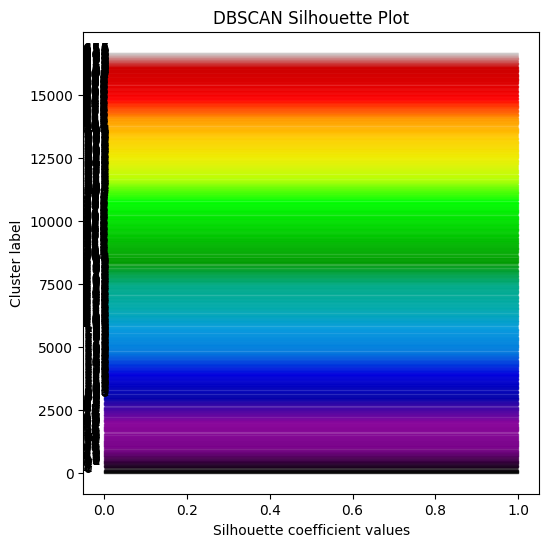

In [26]:
# Visualize DBSCAN Clustering
plt.figure(figsize=(20, 6))

# Silhouette Plot
plt.subplot(1, 3, 1)
silhouette_scores = silhouette_score(scaled_data, dbscan_clusters)
print("DBSCAN Silhouette Score:", silhouette_scores)
# Plot silhouette scores
silhouette_values = silhouette_samples(scaled_data, dbscan_clusters)
y_lower = 10
n_clusters = len(np.unique(dbscan_clusters))
for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[dbscan_clusters == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title('DBSCAN Silhouette Plot')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')

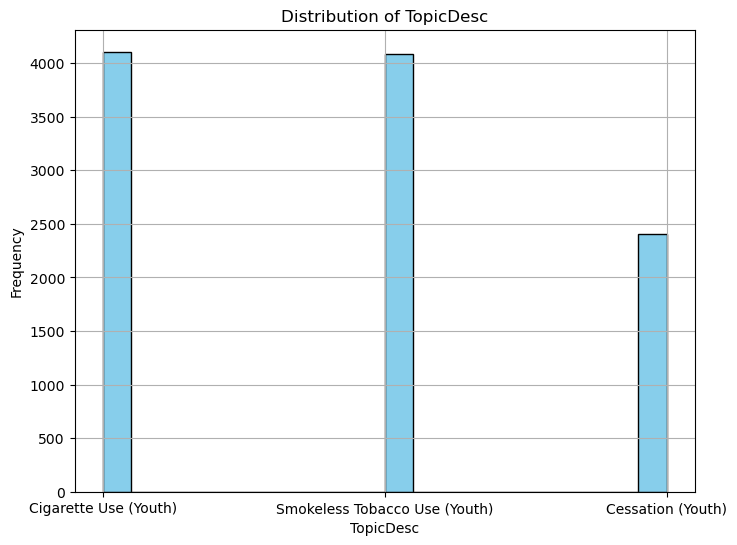

In [ ]:
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'TopicDesc'

# Check the distribution of values in the column
column_values = data[column_name]

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(column_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Distribution of {}'.format(column_name))
plt.grid(True)
plt.show()